# Graph Experiments

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os, sys, datetime
import pandas as pd
import nbimporter

import Preprocessing as pre

Importing Jupyter notebook from Preprocessing.ipynb


## Load Complete Social + Action Graph

In [2]:
# Load weighted digraph from file 

G = nx.read_weighted_edgelist("Data/higggs-complete-graph.edgelist",
                              create_using=nx.DiGraph(), nodetype=int)

social = pre.load_social_graph()

log = pre.read_log()

print(log.shape[0])
print(len(G))
print(len(G.edges))
print(len(social))
print(len(social.edges))

563069
304691
466545
456626
14855842


## Plot Degree Distributions

In [3]:
in_degree = sorted([d for (n, d) in social.in_degree()], reverse=True)
out_degree = sorted([d for (n, d) in social.out_degree()], reverse=True)

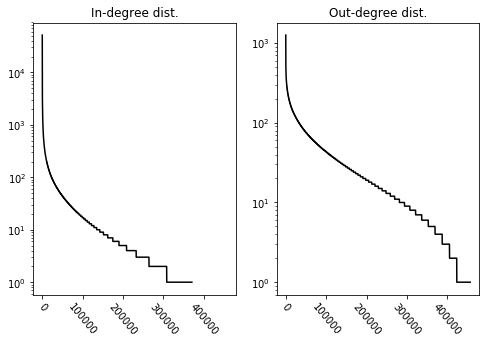

In [7]:
fig = plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.semilogy(range(len(social)), in_degree, color="k")
plt.title("In-degree dist.")

plt.subplot(1, 2, 2)
plt.semilogy(range(len(social)), out_degree, color="k")
plt.title("Out-degree dist.")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=310)

plt.savefig("Report/Figures/deg.png")
plt.show()


In [8]:
print(nx.number_connected_components(G.to_undirected()))
#C = nx.connected_components(G.to_undirected())
#print([len(c) for c in C])

13408


## Action Log Stats

In [ ]:
"""
Compute "Friendliness" of events
"""

activities_between_friends = 0
activities_between_strangers = 0

for date, action in log.iterrows():
    if (social.has_edge(action["user1"], action["user2"]) or social.has_edge(action["user2"], action["user1"])):
        activities_between_friends += 1
    else:
        activities_between_strangers += 1
        
print(activities_between_friends)
print(activities_between_strangers)


In [9]:
i = 0
for u in social:
    if i < 10:
        print("user {} had influence {} times, has {} followers, and follows {} users"
              .format(u, pre.num_times_spread(log, u), pre.num_followers(social, u), pre.num_following(social, u)))
    i += 1


user 1 had influence 0 times, has 16280 followers, and follows 22 users
user 2 had influence 3 times, has 4707 followers, and follows 77 users
user 3 had influence 0 times, has 137 followers, and follows 25 users
user 4 had influence 195 times, has 8643 followers, and follows 402 users
user 5 had influence 29 times, has 2194 followers, and follows 58 users
user 6 had influence 186 times, has 27088 followers, and follows 101 users
user 7 had influence 39 times, has 2146 followers, and follows 99 users
user 8 had influence 1280 times, has 32106 followers, and follows 54 users
user 9 had influence 0 times, has 567 followers, and follows 29 users
user 10 had influence 1 times, has 10204 followers, and follows 305 users


In [13]:
social = social.to_directed()

print(type(social))
print(np.median([d for (_, d) in social.out_degree()]))
print(np.mean([d for (_, d) in social.out_degree()]))

print(np.median([d for (_, d) in social.in_degree()]))
print(np.mean([d for (_, d) in social.in_degree()]))

# Interesting! (32)

<class 'networkx.classes.multidigraph.MultiDiGraph'>
16.0
32.5339380587
4.0
32.5339380587


## Write heuristic seed sets

In [ ]:
"""Why we need to subgraph:"""

soc_nodes = np.array(social.nodes)
G_nodes = np.array(G.nodes)

print(len(soc_nodes))
print(len(G_nodes))

In [ ]:
## Write top-k influencial users to file
k = 50

_infl = pre.get_top_k_infl(log, k)
_in = pre.get_top_k_indeg(social.subgraph(G_nodes), k)
_deg = pre.get_top_k_deg(social.subgraph(G_nodes), k)
_rand = []

for i in range(1, k+1):
    _rand.append(np.random.choice(G_nodes))

np.save("Data/seeds/infl/infl{}.npy".format(k), _infl)
np.save("Data/seeds/in_deg/in_deg{}.npy".format(k), _in)
np.save("Data/seeds/deg/deg{}.npy".format(k), _deg)
np.save("Data/seeds/rand/rand{}.npy".format(k), _rand)
    
print(_infl[0:10])
print([pre.num_times_spread(log, u) for u in _infl[0:10]])

In [ ]:
y=1
#from spread import *

#num_seeds = list(range(1, 50))
#indeg_spreads = []
#deg_spreads = []
#infl_spreads = []
#rand_spreads = []
#
#for i in num_seeds:
#    print("Computing spreads for {} seeds".format(i))
#    indeg_seeds = np.load("Data/seeds/in_deg/in_deg{}.npy".format(i))
#    #deg_seeds = np.load("Data/seeds/deg/deg{}.npy".format(i))
#    #infl_seeds = np.load("Data/seeds/infl/infl{}.npy".format(i))
#    rand_seeds = np.load("Data/seeds/rand/rand{}.npy".format(i))
#    
#    (indeg_n, _) = get_expected_spread(G, indeg_seeds, 100, mean=True)
#    #(deg_n, _) = get_expected_spread(G, deg_seeds, 100, mean=True)
#    (rand_n, _) = get_expected_spread(G, rand_seeds, 100, mean=True)
#    #(infl_n, _) = get_expected_spread(G, infl_seeds, 100, mean=True)
#    
#    indeg_spreads.append(indeg_n)
#    #deg_spreads.append(deg_n)
#    rand_spreads.append(rand_n)
#    #infl_spreads.append(infl_n)
#
#plt.plot(num_seeds, indeg_spreads, c='k')
##plt.plot(num_seeds, deg_spreads, c='b')
#plt.plot(num_seeds, rand_spreads, c='y')
##plt.plot(num_seeds, infl_spreads, c='r')
#
#plt.show()
#
#plt.plot(num_seeds, indeg_spreads, c='k')
#plt.plot(num_seeds, deg_spreads, c='b')
#plt.plot(num_seed, infl_spreads, c='r')
#plt.plot(num_seeds, rand_spreads, c='y')
#
#plt.show()
#
#np.save("Data/spreads/rand_spreads", indeg_spreads)
#np.save("Data/spreads/indeg_spreads", indeg_spreads)
#np.save("Data/spreads/deg_spreads", deg_spreads)
#np.save("Data/spreads/infl_spreads", infl_spreads)
